# Regresión Lineal

En este ejemplo cargaremos un archivo .csv de entrada obtenido por webscraping que contiene diversas URLs a artículos sobre Machine Learning de algunos sitios muy importantes como Techcrunch o KDnuggets y como características de entrada -las columnas- tendremos:
- **Title:** Titulo del Artículo 
- **url:** ruta al artículo 
- **Word count:** la cantidad de palabras del artículo
- **\# of Links:** la cantidad de links donde mencionan el artículo
- **\# comments:** cantidad de comentarios
- **\# Images video:** suma de imágenes (o videos), 
- **\# Elapsed days:** la cantidad de días transcurridos (al momento de crear el archivo)
- **\# Shares:** nuestra columna de salida que será la “cantidad de veces que se compartió el artículo”.

Predecir cuántas veces será compartido un artículo de Machine Learning.

## Regresión lineal simple en Python (con 1 variable)

In [23]:
import numpy as np
import pandas as pd
import seaborn as sb  # noqa: F401

# libreria para visualizar datos estadísticos
import matplotlib.pyplot as plt

%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm  # noqa: F401

plt.rcParams["figure.figsize"] = (16, 9)
plt.style.use("ggplot")
from sklearn import linear_model  # noqa: E402

# libreria de machine learning
from sklearn.metrics import mean_squared_error, r2_score  # noqa: E402

# cargamos los datos de entrada
data = pd.read_csv("articulos_ml.csv")
# veamos cuantas dimensiones y registros contiene
data.shape

(161, 8)

In [24]:
# son 161 registros con 8 columnas. Veamos los primeros registros
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


Se ven algunos campos con valores NaN (nulos) por ejemplo algunas urls o en comentarios.
Veamos algunas estadísticas básicas de nuestros datos de entrada:

In [25]:
# Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


Aqui vemos que la media de palabras en los artículos es de 1808. El artículo más corto tiene 250 palabras y el más extenso 8401.
Intentaremos ver con nuestra relación lineal, si hay una correlación entre la cantidad de palabras del texto y la cantidad de Shares obtenidos.

Hacemos una visualización en general de los datos de entrada:

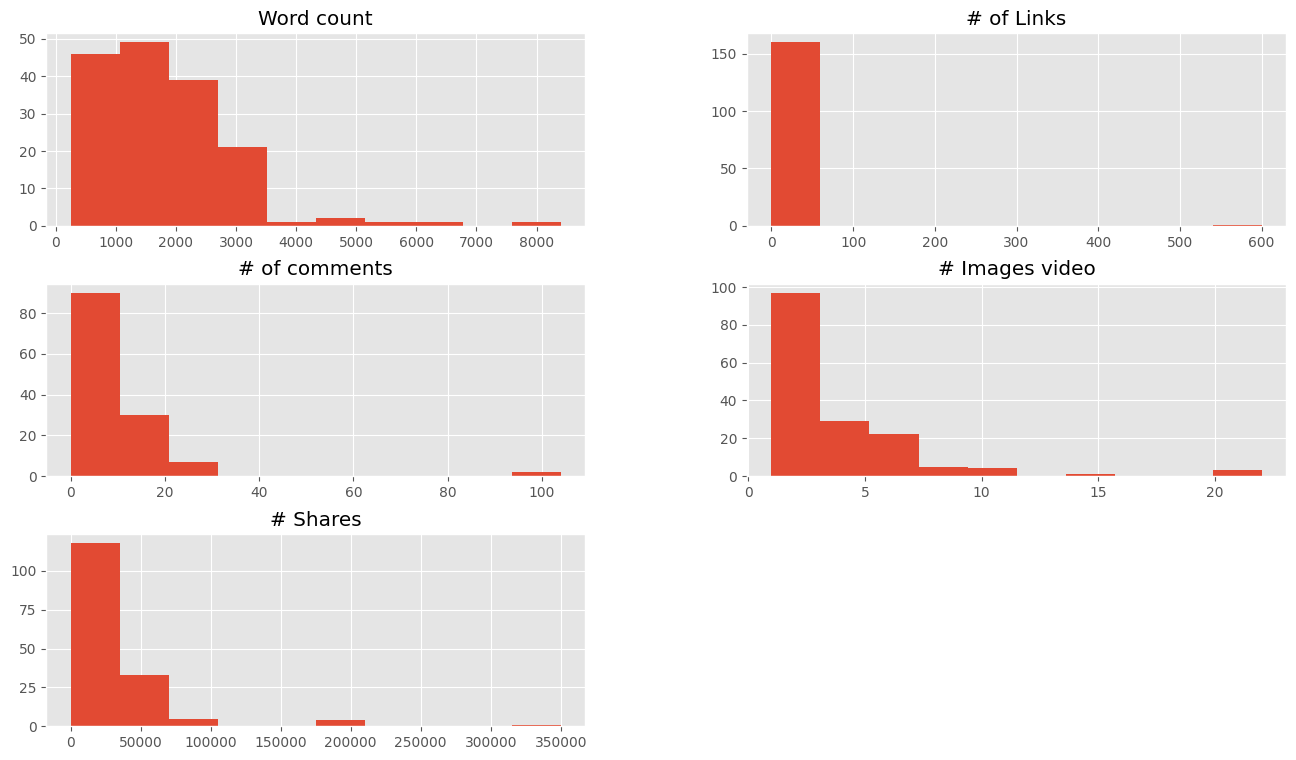

In [26]:
# Visualizamos rápidamente las caraterísticas de entrada
data.drop(["Title", "url", "Elapsed days"], axis=1).hist()
plt.show()

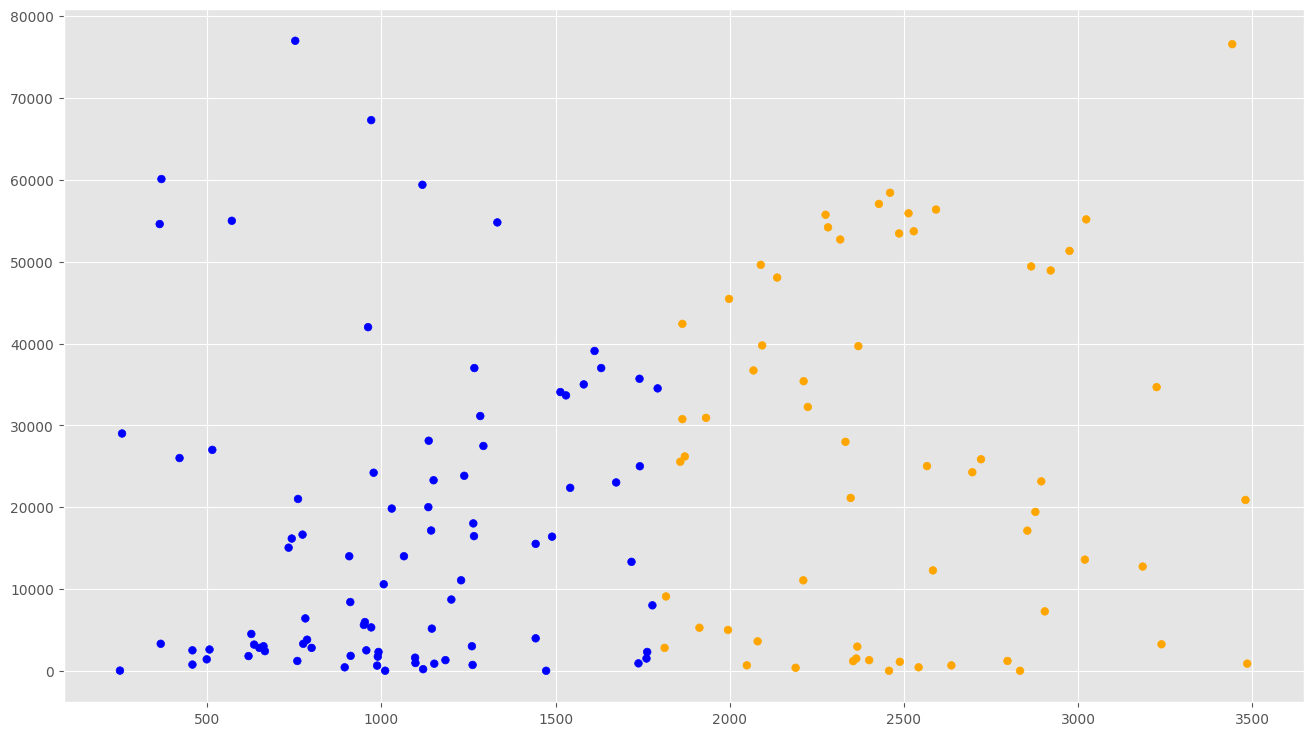

In [27]:
# Vamos a RECORTAR los datos en la zona donde se concentran más los puntos
# esto es en el eje X: entre 0 y 3.500
# y en el eje Y: entre 0 y 80.000
filtered_data = data[(data["Word count"] <= 3500) & (data["# Shares"] <= 80000)]
colores = ["orange", "blue"]
tamanios = [30, 60]
f1 = filtered_data["Word count"].values
f2 = filtered_data["# Shares"].values
# Vamos a pintar en colores los puntos por debajo y por encima de la media de Cantidad de Palabras
asignar = []
for index, row in filtered_data.iterrows():
    if row["Word count"] > 1808:
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

## Regresión Lineal con Python y SKLearn

Vamos a crear nuestros datos de entrada por el momento sólo Word Count y como etiquetas los # Shares. Creamos el objeto LinearRegression y lo hacemos “encajar” (entrenar) con el método `fit`(). Finalmente imprimimos los coeficientes y puntajes obtenidos.

In [28]:
# Asignamos nuestra variable de entrada X para entrenamiento y las etiquetas Y.
dataX = filtered_data[["Word count"]]
X_train = np.array(dataX)
y_train = filtered_data["# Shares"].values
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print("Coefficients: \n", regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print("Independent term: \n", regr.intercept_)
# Error Cuadrado Medio
print("Mean squared error: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print("Variance score: %.2f" % r2_score(y_train, y_pred))

Coefficients: 
 [5.69765366]
Independent term: 
 11200.30322307416
Mean squared error: 372888728.34
Variance score: 0.06


De la ecuación de la recta y = mX + b nuestra pendiente “m” es el coeficiente 5,69 y el término independiente “b” es 11200. Tenemos un Error Cuadrático medio enorme… por lo que en realidad este modelo no será muy bueno Pero estamos aprendiendo a usarlo, que es lo que nos importa ahora Esto también se ve reejado en el puntaje de Varianza que debería ser cercano a 1.0.

## Predicción en regresión lineal simple

Vamos a intentar probar nuestro algoritmo, suponiendo que quisiéramos predecir cuántos “compartir” obtendrá un articulo sobre ML de 2000 palabras

In [34]:
#Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
y_Dosmil

array([22595.61053785])

## Visualización de la Recta

Veamos la recta que obtuvimos:

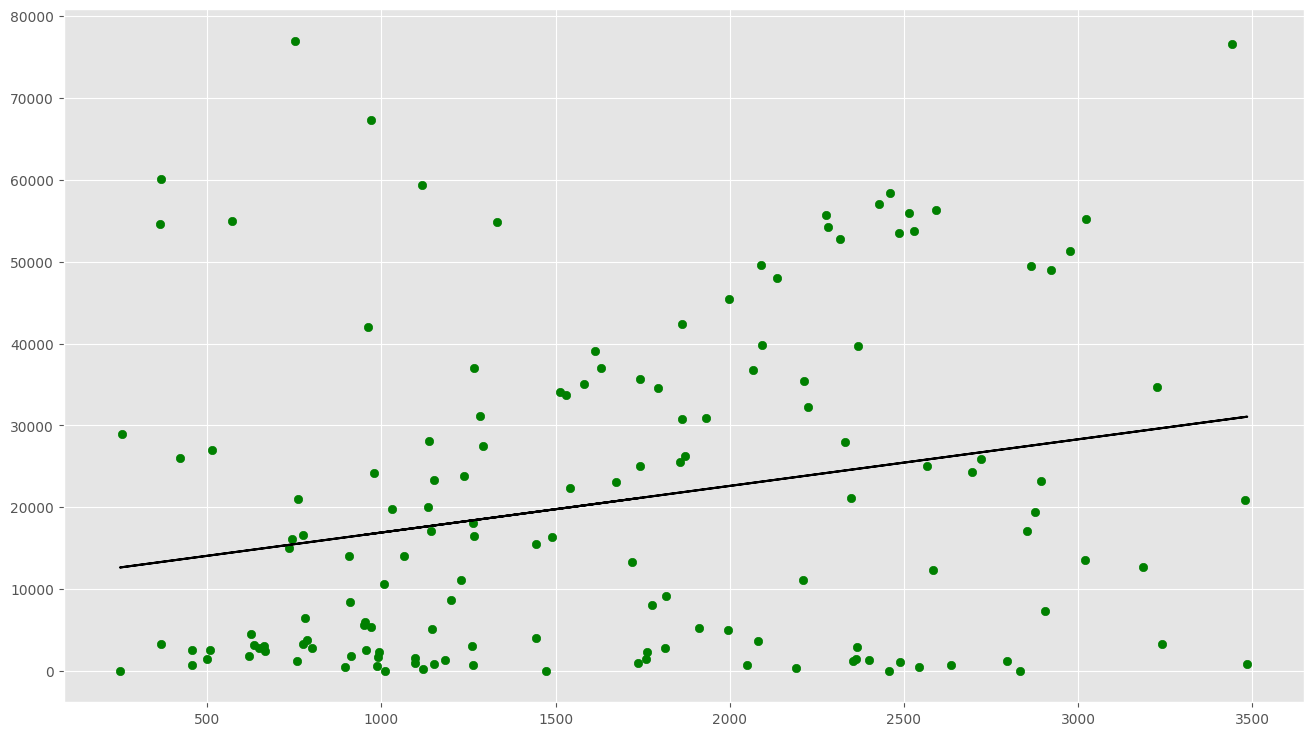

In [44]:
plt.scatter(X_train, y_train, color="g")
plt.plot(dataX, y_pred, color="k")

## Regresión Lineal Múltiple en Python

Nuestra “ecuación de la Recta”, ahora pasa a ser:
Y = b + m1 X1 + m2 X2 + … + m(n) X(n)
En nuestro caso, utilizaremos 2 “variables predictivas” para poder gracar en 3D, pero recordar que para mejores predicciones podemos utilizar más de 2 entradas y prescindir del grafico.
Nuestra primer variable seguirá siendo la cantidad de palabras y la segunda variable será la suma de 3 columnas de entrada: la cantidad de enlaces, comentarios y cantidad de imágenes. Vamos a programar!

In [45]:
# Vamos a intentar mejorar el Modelo, con una dimensión más:
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes
suma = (
    filtered_data["# of Links"]
    + filtered_data["# of comments"].fillna(0)
    + filtered_data["# Images video"]
)
dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data["# Shares"].values

In [46]:
# Vamos a intentar mejorar el Modelo, con una dimensión más:
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes
suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])
dataX2 = pd.DataFrame()

Ya tenemos nuestras 2 variables de entrada en XY_train y nuestra variable de salida pasa de ser “Y” a ser el eje “Z”.

Creamos un nuevo objeto de Regresión lineal con SKLearn pero esta vez tendrá las dos dimensiones que entrenar: las que contiene XY_train. Al
igual que antes, imprimimos los coeficientes y puntajes obtenidos:

In [47]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


Como vemos, obtenemos 2 coeficientes (cada uno correspondiente a nuestras 2 variables predictivas), pues ahora lo que graficamos no será una linea si no, un plano en 3 Dimensiones.

El error obtenido sigue siendo grande, aunque algo mejor que el anterior y el puntaje de Varianza mejora casi el doble del anterior (aunque sigue siendo muy malo, muy lejos del 1).

## Visualizar un plano en 3 Dimensiones en Python 
Graficaremos nuestros puntos de las características de entrada en color azul y los puntos proyectados en el plano en rojo. Recordemos que en esta gráfica, el eje Z corresponde a la “altura” y representa la cantidad de Shares que obtendremos.

In [48]:
fig = plt.figure()
ax = Axes3D(fig)
# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))
# calculamos los valores del plano para los puntos x e y
nuevoX = regr2.coef_[0] * xx
nuevoY = regr2.coef_[1] * yy
# calculamos los correspondientes valores para z. Debemos sumar el punto de intercepción
z = nuevoX + nuevoY + regr2.intercept_
# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap="hot")
# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c="blue", s=30)
# Graficamos en rojo, los puntos que
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c="red", s=40)

<Figure size 1600x900 with 0 Axes>